In [25]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Replace NaN with 0
train.replace(np.nan, 0, regex=True,inplace=True)
test.replace(np.nan, 0, regex=True,inplace=True)

y = train['NU_NOTA_MT']
X = train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]

# X_test = test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]

# Create linear regression object
lin_regr = linear_model.LinearRegression()

In [27]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Train the model using the training sets
lin_regr.fit(X_train, y_train)

y_pred_train = lin_regr.predict(X_train)
# Make predictions using the testing set
y_pred_test = lin_regr.predict(X_test)

# y_pred = [0.0 if item < 0 else item for item in y_pred]

# test['NU_NOTA_MT'] = y_pred
    
# test.to_csv("resultado.csv", mode='w', columns=['NU_INSCRICAO','NU_NOTA_MT'], index = False)

# The coefficients
#print('Coefficients: \n', lin_regr.coef_)

print('Stats of the train set')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_train))
# # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_pred_train))

print('\n Stats of the test set')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
# # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))

Stats of the train set
Mean squared error: 5180.23
Coefficient of determination: 0.90

 Stats of the test set
Mean squared error: 5180.36
Coefficient of determination: 0.90


In [29]:
# Teste com split train e test 
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

print('Stats of the train set')
print('Coefficient of determination: %.2f'
      % regr.score(X_test, y_test))

print('\n Stats of the test set')
print('Coefficient of determination: %.2f'
      % regr.score(X_test, y_test))

Stats of the train set
Coefficient of determination: 0.92

 Stats of the test set
Coefficient of determination: 0.92


In [46]:
# Teste a vera
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Replace NaN with 0
train.replace(np.nan, 0, regex=True,inplace=True)
test.replace(np.nan, 0, regex=True,inplace=True)

y = train['NU_NOTA_MT']
X = train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]



regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)


# y_test = regr.predict(X)

print('Stats of the train set')
print('Coefficient of determination: %.8f'
      % regr.score(X, y))

Stats of the train set
Coefficient of determination: 0.91574425


In [52]:
regr = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes=(6,6),learning_rate='adaptive').fit(X, y)

print('Stats of the train set')
print('Coefficient of determination: %.8f'
      % regr.score(X, y))

Stats of the train set
Coefficient of determination: 0.91743071


In [53]:
X_test = test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]
y_pred = regr.predict(X_test)
y_pred = [0.0 if item < 0 else item for item in y_pred]

test['NU_NOTA_MT'] = y_pred
    
test.to_csv("resultado.csv", mode='w', columns=['NU_INSCRICAO','NU_NOTA_MT'], index = False)

In [12]:
test['NU_NOTA_MT'] = y_pred
test

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,420.0,B,A,C,A,A,C,C,A,426.472355
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,580.0,E,B,C,B,B,B,F,A,479.615917
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,320.0,E,E,D,B,B,A,0,A,585.506912
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,0.0,H,E,G,B,B,A,0,A,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,320.0,D,H,H,C,B,A,0,A,568.275618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,...,500.0,E,E,D,A,B,A,0,A,448.118507
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,...,520.0,C,C,C,A,A,A,0,A,426.608079
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,...,640.0,D,F,D,B,B,A,0,D,592.198851
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,...,520.0,C,E,C,A,A,A,0,A,489.336970


In [ ]:
dataset_original = pd.read_csv('testfiles/train.csv')
dataset_test = pd.read_csv('testfiles/test.csv')

ds = dataset_original[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].dropna()

y = ds['NU_NOTA_MT']
X = ds[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Create linear regression object
lin_regr = linear_model.LinearRegression()


# Train the model using the training sets
lin_regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lin_regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', lin_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

In [3]:
dataset_original = pd.read_csv('testfiles/train.csv')

ds = dataset_original[[
    'NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
    'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
    'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
    'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
    'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
    'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
    'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
    'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027',
    'Q047'
]]

In [37]:
# replace letters with numbers
gender_dict = {'M': 0, 'F': 1}
ds = ds.replace({'TP_SEXO': gender_dict})

letter_num_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15,
    'P': 16,
    'Q': 17
}
ds = ds.replace(letter_num_dict)

In [38]:
# drop features with few values
print(ds.count() / 13730 * 100)
ds = ds.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], axis=1)

# drop indexes with NaN
ds = ds.dropna()
print(ds.count() / 10097 * 100)

# drop features with no correlation
# ds_corr = ds.corr()
ds = ds.drop(
    ['IN_CEGUEIRA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC'],
    axis=1)

NU_NOTA_MT                 73.801894
CO_UF_RESIDENCIA          100.000000
NU_IDADE                  100.000000
TP_SEXO                   100.000000
TP_COR_RACA               100.000000
TP_NACIONALIDADE          100.000000
TP_ST_CONCLUSAO           100.000000
TP_ANO_CONCLUIU           100.000000
TP_ESCOLA                 100.000000
TP_ENSINO                  31.187181
IN_TREINEIRO              100.000000
TP_DEPENDENCIA_ADM_ESC     31.187181
IN_BAIXA_VISAO            100.000000
IN_CEGUEIRA               100.000000
IN_SURDEZ                 100.000000
IN_DISLEXIA               100.000000
IN_DISCALCULIA            100.000000
IN_SABATISTA              100.000000
IN_GESTANTE               100.000000
IN_IDOSO                  100.000000
TP_PRESENCA_CN            100.000000
TP_PRESENCA_CH            100.000000
TP_PRESENCA_LC            100.000000
NU_NOTA_CN                 75.316824
NU_NOTA_CH                 75.316824
NU_NOTA_LC                 73.801894
TP_LINGUA                 100.000000
T

In [39]:
# drop features with low correlation
# ds_corr = ds.corr()
ds = ds.drop([
    'NU_IDADE', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
    'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA',
    'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
    'TP_STATUS_REDACAO', 'Q026'
],
             axis=1)


In [40]:
# drop features with low correlation
# ds_corr = ds.corr()
ds = ds.drop([
    'CO_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA'
],
             axis=1)


In [41]:
# drop features with low correlation
# ds_corr = ds.corr()
ds = ds.drop([
    'TP_LINGUA', 'Q001','Q002','Q025'
],
             axis=1)


In [42]:
ds_corr = ds.corr()
print(ds_corr)

                 NU_NOTA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
NU_NOTA_MT         1.000000    0.584941    0.529594    0.492031   
NU_NOTA_CN         0.584941    1.000000    0.611573    0.545667   
NU_NOTA_CH         0.529594    0.611573    1.000000    0.692988   
NU_NOTA_LC         0.492031    0.545667    0.692988    1.000000   
NU_NOTA_COMP1      0.299811    0.357672    0.443809    0.431546   
NU_NOTA_COMP2      0.335441    0.412894    0.488050    0.453135   
NU_NOTA_COMP3      0.350556    0.429447    0.510452    0.475782   
NU_NOTA_COMP4      0.342629    0.407747    0.488797    0.468100   
NU_NOTA_COMP5      0.343998    0.416349    0.494798    0.443357   
NU_NOTA_REDACAO    0.379891    0.459938    0.550582    0.513982   
Q006               0.410169    0.398853    0.377580    0.357225   
Q024               0.323617    0.313991    0.318816    0.320468   
Q047               0.351553    0.378773    0.319009    0.292787   

                 NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3 

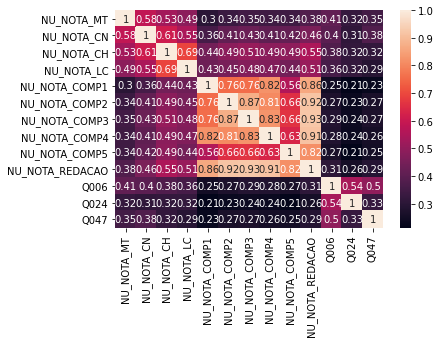

In [43]:

# plt.matshow(ds.corr())
sns.heatmap(ds_corr, annot=True)
plt.show()

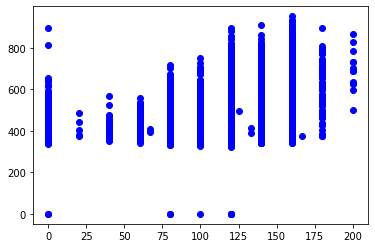

In [44]:
plt.scatter(ds['NU_NOTA_COMP1'],ds['NU_NOTA_MT'],  color='blue')

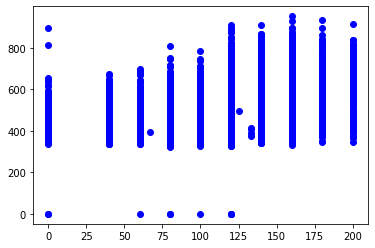

In [45]:
plt.scatter(ds['NU_NOTA_COMP2'],ds['NU_NOTA_MT'],  color='blue')

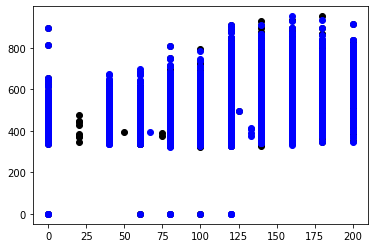

In [46]:
plt.scatter(ds['NU_NOTA_COMP4'],ds['NU_NOTA_MT'],  color='black')
plt.scatter(ds['NU_NOTA_COMP2'],ds['NU_NOTA_MT'],  color='blue')


0        120.0
1        140.0
5        120.0
6        100.0
7        140.0
         ...  
13725    120.0
13726    120.0
13727    120.0
13728    100.0
13729    120.0
Name: NU_NOTA_COMP1, Length: 10097, dtype: float64

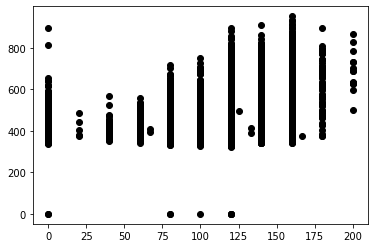

In [47]:
plt.scatter(ds['NU_NOTA_COMP1'],ds['NU_NOTA_MT'],  color='black')
ds['NU_NOTA_COMP1']

In [48]:
y = ds['NU_NOTA_MT']
X = ds.drop('NU_NOTA_MT', axis=1)

In [49]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [55]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [61]:
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.fit_transform(y_test)
y_test.min()

0.0

In [56]:

# Create linear regression object
lin_regr = linear_model.LinearRegression()


# Train the model using the training sets
lin_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Make predictions using the testing set
y_pred = lin_regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', lin_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 6573.91
Coefficient of determination: 0.34


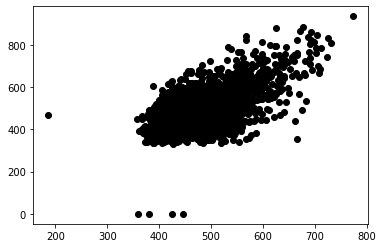

In [22]:
# Plot outputs

plt.scatter(y_pred,y_test,  color='black')
#plt.plot(y_pred, color='blue')
#y_test.plot(kind='line',y='NU_NOTA_MT',color='red')


plt.show()

In [27]:
y_pred - y_test

3607     -58.368369
6080    -123.694470
2844       4.670454
10263    137.723901
9314      52.687736
            ...    
11103    119.399975
11247    -71.913202
3831       3.863770
2348     -58.872449
7874     -52.785652
Name: NU_NOTA_MT, Length: 2020, dtype: float64